In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import distance_matrix
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import depth_first_tree
import scipy
import networkx as nx

In [2]:
df = pd.io.parsers.read_csv(
    filepath_or_buffer='points.csv',
    header=None,
    sep=',',
    )
df.shape

(26, 2)

In [3]:
df[1]

0      0.577
1      1.732
2      0.000
3      2.309
4      0.577
5      1.732
6      0.000
7      2.309
8      0.577
9      1.732
10     6.000
11    10.000
12     0.577
13     1.732
14     0.000
15     2.309
16     0.577
17     1.732
18    10.577
19    11.732
20    10.000
21    12.309
22    10.577
23    11.732
24    11.000
25    12.000
Name: 1, dtype: float64

In [4]:
x=np.array(df)
x
df.shape

(26, 2)

In [5]:
x

array([[ 0.   ,  0.577],
       [ 0.   ,  1.732],
       [ 1.   ,  0.   ],
       [ 1.   ,  2.309],
       [ 2.   ,  0.577],
       [ 2.   ,  1.732],
       [ 3.   ,  0.   ],
       [ 3.   ,  2.309],
       [ 4.   ,  0.577],
       [ 4.   ,  1.732],
       [ 6.   ,  6.   ],
       [10.   , 10.   ],
       [10.   ,  0.577],
       [10.   ,  1.732],
       [11.   ,  0.   ],
       [11.   ,  2.309],
       [12.   ,  0.577],
       [12.   ,  1.732],
       [ 0.   , 10.577],
       [ 0.   , 11.732],
       [ 1.   , 10.   ],
       [ 1.   , 12.309],
       [ 2.   , 10.577],
       [ 2.   , 11.732],
       [10.   , 11.   ],
       [10.   , 12.   ]])

In [6]:
n=df.shape[0]
d=np.zeros(n)

for c in range(n):
    d[c]=np.sqrt(x[c,0]*x[c,0]+x[c,1]*x[c,1]) 

In [7]:
d

array([ 0.577     ,  1.732     ,  1.        ,  2.51624343,  2.08156888,
        2.64571805,  3.        ,  3.78569426,  4.04140186,  4.35887875,
        8.48528137, 14.14213562, 10.01663262, 10.14888289, 11.        ,
       11.2397278 , 12.01386403, 12.12434839, 10.577     , 11.732     ,
       10.04987562, 12.34955388, 10.76442887, 11.90125304, 14.86606875,
       15.62049935])

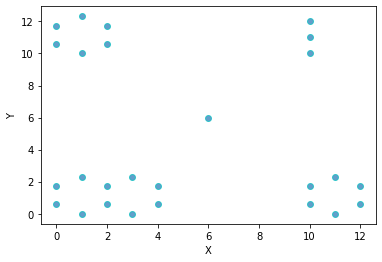

In [8]:
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(
    x[:,0],
    x[:,1],
    cmap='rainbow',
    alpha=0.7,
    edgecolors='c'
)

In [9]:
main = np.hstack((d.reshape(n,1), x.reshape(n,2)    )).real
main


array([[ 0.577     ,  0.        ,  0.577     ],
       [ 1.732     ,  0.        ,  1.732     ],
       [ 1.        ,  1.        ,  0.        ],
       [ 2.51624343,  1.        ,  2.309     ],
       [ 2.08156888,  2.        ,  0.577     ],
       [ 2.64571805,  2.        ,  1.732     ],
       [ 3.        ,  3.        ,  0.        ],
       [ 3.78569426,  3.        ,  2.309     ],
       [ 4.04140186,  4.        ,  0.577     ],
       [ 4.35887875,  4.        ,  1.732     ],
       [ 8.48528137,  6.        ,  6.        ],
       [14.14213562, 10.        , 10.        ],
       [10.01663262, 10.        ,  0.577     ],
       [10.14888289, 10.        ,  1.732     ],
       [11.        , 11.        ,  0.        ],
       [11.2397278 , 11.        ,  2.309     ],
       [12.01386403, 12.        ,  0.577     ],
       [12.12434839, 12.        ,  1.732     ],
       [10.577     ,  0.        , 10.577     ],
       [11.732     ,  0.        , 11.732     ],
       [10.04987562,  1.        , 10.   

In [10]:
main_sorted_arg = np.argsort(main[:, 0])
main_sort_2 = main[main_sorted_arg]

In [11]:
#bond distance

# bond_distance = 1.732-.576
bond_distance = 2/ np.sqrt(3) + 0.001
bond_distance

1.1557005383792516

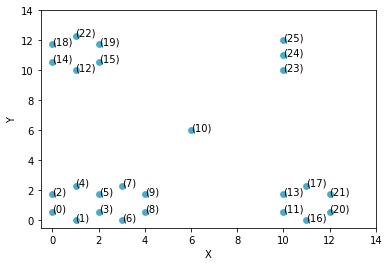

In [12]:
#find points in distance 5

# filtered = [x for (x in mainSort and x[0] < 5)]

# filtered = list(filter(lambda x: (x[0] < 5) , main_sort_2))
filtered = main_sort_2
np_filtered = np.asarray(filtered)
marker = np.arange(len(filtered))
np_filtered
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(
    np_filtered[:,1],
    np_filtered[:,2],
    cmap='rainbow',
    alpha=0.7,
    edgecolors='c',
)
plt.xlim(-0.5,  14)
plt.ylim(-0.5, 14)
for x in marker:
    plt.text(np_filtered[x][1], np_filtered[x][2], '({})'.format(x))


In [13]:
# graph2 = distance_matrix([[0,0,0,0],[0,1,2,3]], [[1,1,1,5],[2,2,2,7]])
# print(graph2)
def checkDuplicate(neddleCycle, cycles):
    neddleCycle = np.asarray(neddleCycle)
    cycles = np.asarray(cycles)
    
    for cycle in cycles:
        if len(cycle) != neddleCycle.shape[0]:
            continue
        if np.all(np.isin(neddleCycle, cycle)):
            return True
        
    return False
    
graph = distance_matrix(np_filtered[:, 1:], np_filtered[:, 1:]) <= bond_distance
np.fill_diagonal(graph, False)
# df = pd.DataFrame(np.asarray(graph, dtype=np.uint8)[11:22, 11:22])
# df
# nodes = np.arange(graph.shape[0])
# edges_row, edges_col = np.where(graph == 1)
# edges = zip(edges_row.tolist(), edges_row.tolist())
# list(edges)
G = nx.DiGraph()
G = nx.from_numpy_matrix(graph, create_using=nx.DiGraph)
all_cycles = list(nx.simple_cycles(G))
cycles = []

for cycle in all_cycles:
    if len(cycle) > 2 and not checkDuplicate(cycle, cycles):
        cycles.append(cycle)
        
cycles


[[12, 15, 19, 22, 18, 14],
 [11, 16, 20, 21, 17, 13],
 [0, 2, 4, 5, 7, 9, 8, 6, 3, 1],
 [0, 2, 4, 5, 3, 1],
 [3, 6, 8, 9, 7, 5]]

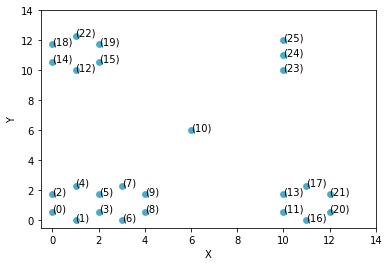

In [14]:
#find points in distance 5

# filtered = [x for (x in mainSort and x[0] < 5)]

# filtered = list(filter(lambda x: (x[0] < 5) , main_sort_2))
filtered = main_sort_2
np_filtered = np.asarray(filtered)
marker = np.arange(len(filtered))
np_filtered
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(
    np_filtered[:,1],
    np_filtered[:,2],
    cmap='rainbow',
    alpha=0.7,
    edgecolors='c',
)
plt.xlim(-0.5,  14)
plt.ylim(-0.5, 14)
for x in marker:
    plt.text(np_filtered[x][1], np_filtered[x][2], '({})'.format(x))


In [15]:
X = csr_matrix(graph)
Tcsr = depth_first_tree(X, 0, directed=False)
dfs_tree = Tcsr.toarray().astype(int)

rows, cols = np.where(dfs_tree == 1)
edges = zip(rows.tolist(), cols.tolist())
node_map = {}
# nodes = 
# for x, y in edges:
#     if x not in node_map:
#         node_map[x] = []
#     node_map[x].append(y)
    
# print(node_map)
# tree = []
# x = list(node_map.keys())[0]
# print(node_map[x][0])
# i = 0
# while(True and i < 7):
#     if x not in rows:
#         break
#     tree.append((x, node_map[x][0]))
#     x = node_map[x][0]
#     i += 1
# print(tree)
np.nonzero(dfs_tree)[0]
# np.nonzero([0, 1, 0, 0, 0, 1])

array([0, 1, 3, 4, 5, 5, 7, 8, 9])

In [16]:
start_node = 0
trees = []
i = 0
flags = np.ones((graph.shape[0]))
count = 0

while(True):
    Tcsr = depth_first_tree(X, start_node, directed=False)
    dfs_tree = Tcsr.toarray().astype(int)
#     print(np.nonzero(dfs_tree))
    tree = np.nonzero(dfs_tree)[1]
    trees.append(tree)
    flags[tree] = 0
    flags[start_node] = 0
    count += (tree.shape[0] + 1)
    
    rows, cols = np.where(dfs_tree == 1)
    edges = zip(rows.tolist(), cols.tolist())
    reverseEdges = zip(cols.tolist(), rows.tolist())
    nodes = np.hstack((start_node, tree))
#     print(nodes)
    print(list(edges))
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(list(edges))
    G.add_edges_from(list(reverseEdges))
    
#     nx.draw(G)
#     plt.show()
    
    print(list(nx.simple_cycles(G)))
    
    if np.sum(flags) == 0:
        break
    start_node = np.nonzero(flags)[0][0]
        
print(trees)
print(count)

[(0, 1), (1, 3), (3, 5), (4, 2), (5, 4), (5, 7), (7, 9), (8, 6), (9, 8)]
[]
[]
[]
[(11, 13), (13, 17), (17, 21), (20, 16), (21, 20)]
[]
[(12, 14), (14, 18), (18, 22), (19, 15), (22, 19)]
[]
[(23, 24), (24, 25)]
[]
[array([1, 3, 5, 2, 4, 7, 9, 6, 8]), array([], dtype=int64), array([13, 17, 21, 16, 20]), array([14, 18, 22, 15, 19]), array([24, 25])]
26


In [17]:
# graph2 = distance_matrix([[0,0,0,0],[0,1,2,3]], [[1,1,1,5],[2,2,2,7]])
# print(graph2)
def checkDuplicate(neddleCycle, cycles):
    neddleCycle = np.asarray(neddleCycle)
    cycles = np.asarray(cycles)
    
    for cycle in cycles:
        if len(cycle) != neddleCycle.shape[0]:
            continue
        if np.all(np.isin(neddleCycle, cycle)):
            return True
        
    return False

def checkDuplicates(neddleCycle, cycles):
    neddleCycle = np.asarray(neddleCycle)
    cycles = np.asarray(cycles)
    
    for cycle in cycles:
        if len(cycle) != neddleCycle.shape[0]:
            continue
        if np.all(np.isin(neddleCycle[0], cycle[0])):
            return True
        
    return False
    
graph = distance_matrix(np_filtered[:, 1:], np_filtered[:, 1:]) <= bond_distance
np.fill_diagonal(graph, False)
# df = pd.DataFrame(np.asarray(graph, dtype=np.uint8)[11:22, 11:22])
# df
# nodes = np.arange(graph.shape[0])
# edges_row, edges_col = np.where(graph == 1)
# edges = zip(edges_row.tolist(), edges_row.tolist())
# list(edges)
G = nx.DiGraph()
G = nx.from_numpy_matrix(graph, create_using=nx.DiGraph)
all_cycles = list(nx.simple_cycles(G))
cycles = []

for cycle in all_cycles:
    if len(cycle) > 2 and not checkDuplicate(cycle, cycles):
        cycles.append(cycle)
        
        
cycles
#cycles.append([21,22,23,44,55,66,77,88,99,100,1201])
cycles

[[12, 15, 19, 22, 18, 14],
 [11, 16, 20, 21, 17, 13],
 [0, 2, 4, 5, 7, 9, 8, 6, 3, 1],
 [0, 2, 4, 5, 3, 1],
 [3, 6, 8, 9, 7, 5]]

In [18]:
# for i in range(len(cycles)):
#     a[i]=len(cycles[i])
# # a=len(cycles[2])
# rings=np.array(cycles,dtype=np.int)
# rings
# np.asarray(rings[i])



# print(cycles)

ARnumber=np.unique(np.hstack(cycles)).shape[0]
ALnumber=df.shape[0]


# 6 membered ring == 4
# 
a = {}

boro_array = []
choto_array = []

def isSubSet(current, toCompare):
    
    return np.in1d(toCompare,current).all()

i = 0
for r in cycles:
    if(len(r)) < 8:
        choto_array.append(r)
        i += 1
        continue
    if i > 0:
        prev_item = cycles[i-1]
        
        if isSubSet(r, prev_item):
            #remove r from cycle or do some other thing
            print("Subset paise agertay")
            print(r)
            print(prev_item)
            boro_array.append(r)
            i+=1
            continue
        
        
    if i < len(cycles)-1:
        next_item = cycles[i+1]
        
        if isSubSet(r, next_item):
            #remove r from cycle or do some other thing
            print("Subset paise porertay")
            print(r)
            print(next_item)
            boro_array.append(r)
            i+=1
            continue
        
    
    choto_array.append(r)
    
    i += 1
    
print("Boro array",boro_array)
print("Choto array",choto_array)

for r in cycles:
    if len(r) in a:
        a[len(r)] = a[len(r)] + 1
    else:
        a[len(r)] = 1

    


Subset paise porertay
[0, 2, 4, 5, 7, 9, 8, 6, 3, 1]
[0, 2, 4, 5, 3, 1]
Boro array [[0, 2, 4, 5, 7, 9, 8, 6, 3, 1]]
Choto array [[12, 15, 19, 22, 18, 14], [11, 16, 20, 21, 17, 13], [0, 2, 4, 5, 3, 1], [3, 6, 8, 9, 7, 5]]


In [19]:
a[6] =2
a[10] -1

0

In [20]:
df.shape[0]

26

In [21]:
a = [0, 7, 9, 8, 6, 3, 1, 2, 4, 5]

b = [0, 2, 5, 7, 9]

np.in1d(b,a).all()

True